In [4]:
import pandas as pd
# from tabulate import tabulate
import numpy as np
from pygobnilp.gobnilp import Gobnilp
# import bnlearn as bn
import pgmpy
import itertools
from scipy.stats import chi2_contingency #check for independence between 2 variables
from scipy.stats import power_divergence
from pgmpy.estimators.CITests import log_likelihood
from pgmpy.estimators.CITests import chi_square
# from pgmpy.factors.continuous.discretize import BaseDiscretizer

In [5]:
def csv_format_discrete(csv_file):
    df = pd.read_csv(csv_file, sep="\s+")
    return df.drop([0])

#returns the csv_file in a pandas dataframe, formatted properly, discrete dataset only

### chi-squared test

In [7]:
#how do we measure the consistensy
def chi2bool(df):
#returns a tuple(chi2, p_value, dof) if boolean = false
#the null hypothesis is that they are independent of each other
#if true, the p_value is higher than the significance test, we do not reject the null hypothesis
#if false, the p_value is lower than the significance test, we reject the null hypothesis
    v = list(df)
    empty = []
    empty_1 = []
    empty_2 = []
    empty_3 = []
    empty_4 = []
    itertools_combinations = list(itertools.combinations(v, 2)) #finds every possible combination of list(df)
    for i in itertools_combinations:
        empty_1.append(i[0])
        empty_2.append(i[1])
        
    total_number_of_combinations = len(empty_1)
    
    for t in range(len(itertools_combinations)):
        empty.append(itertools_combinations[t])
        
    for value in range(len(empty_1)):
        empty_3.append(value)
        
    for x,y,i,j in zip(empty_1, empty_2, empty, empty_3):
        chisquare = chi_square(X=x, Y=y, Z=[], data=df, significance_level=0.10, boolean=True) #returns chi, p_value, dof
        empty_4.append([j, i , chisquare])
        
    return empty_4

In [8]:
def chi2val(df):
#returns a tuple(chi2, p_value, dof) if boolean = false
#the null hypothesis is that they are independent of each other
#if true, the p_value is higher than the significance test, we do not reject the null hypothesis
#if false, the p_value is lower than the significance test, we reject the null hypothesis
    v = list(df)
    empty = []
    empty_1 = []
    empty_2 = []
    empty_3 = []
    empty_4 = []
    itertools_combinations = list(itertools.combinations(v, 2)) #finds every possible combination of list(df)
    for i in itertools_combinations:
        empty_1.append(i[0])
        empty_2.append(i[1])
        
    total_number_of_combinations = len(empty_1)
    
    for t in range(len(itertools_combinations)):
        empty.append(itertools_combinations[t])
        
    for value in range(len(empty_1)):
        empty_3.append(value)
        
    for x,y,i,j in zip(empty_1, empty_2, empty, empty_3):
        chisquare = chi_square(X=x, Y=y, Z=[], data=df, significance_level=0.05, boolean=False) #returns chi, p_value, dof
        empty_4.append([j, i , chisquare])
        
    return empty_4


In [9]:
#tests whether x is independent of y given a single variable z 
def chi2condbool(df):
    test_list_0 = []
    test_list_1 = []
    test_list_2 = []
    chi2 = []
    v = list(df)
    combine = list(itertools.combinations(v, 3)) #nC3 
    for i in combine:
        test_list_0.append(i[0])
        test_list_1.append(i[1])
        test_list_2.append(i[2])
    for a,b,c in zip(test_list_0, test_list_1, test_list_2):
        chisquare = chi_square(X=a, Y=b, Z=[c], data=df, significance_level=0.05, boolean=True)
        chi2.append([a,b,c,chisquare])
    return sortReturn(chi2)

In [10]:
#tests whether x is independent of y given a single variable z 
def chi2condval(df):
    test_list_0 = []
    test_list_1 = []
    test_list_2 = []
    chi2 = []
    v = list(df)
    combine = list(itertools.combinations(v, 3)) #nC3 
    for i in combine:
        test_list_0.append(i[0])
        test_list_1.append(i[1])
        test_list_2.append(i[2])
    for a,b,c in zip(test_list_0, test_list_1, test_list_2):
        chisquare = chi_square(X=a, Y=b, Z=[c], data=df, significance_level=0.05, boolean=False)
        chi2.append([a,b,c,chisquare])
    return chi2

### log-likelihood tests

In [11]:
def g2val(df):
#returns a tuple(chi2, p_value, dof) if boolean = false
#the null hypothesis is that they are independent of each other
#if true, the p_value is higher than the significance test, we do not reject the null hypothesis
#if false, the p_value is lower than the significance test, we reject the null hypothesis
    v = list(df)
    empty = []
    empty_1 = []
    empty_2 = []
    empty_3 = []
    empty_4 = []
    itertools_combinations = list(itertools.combinations(v, 2)) #finds every possible combination of list(df)
    for i in itertools_combinations:
        empty_1.append(i[0])
        empty_2.append(i[1])
        
    total_number_of_combinations = len(empty_1)
    
    for t in range(len(itertools_combinations)):
        empty.append(itertools_combinations[t])
        
    for value in range(len(empty_1)):
        empty_3.append(value)
        
    for x,y,i,j in zip(empty_1, empty_2, empty, empty_3):
        g2 = log_likelihood(X=x, Y=y, Z=[], significance_level=0.05, boolean=True, data=df) 
        empty_4.append([j, i , g2])
        
    return empty_4

### Sorting Functions

In [12]:
def sortReturn(data):
    #just a sorting function
    true_list = []
    false_list = []
    for i in data:
        if True in i:
            true_list.append(i)
        if False in i:
            false_list.append(i)
    return true_list, false_list

In [13]:
#returns a list with a tuple of combinations of false
def false2tuple(data):
    empty = []
    false_list_of_tuples = []
    new_df = pd.DataFrame(data)
    newer_df = new_df[1]
    return newer_df

### CONDITIONAL MAIN CODE

In [83]:
#returns the FALSE values of chi2condbool
def conditional_1(df):
    first_letter = []
    second_letter = []
    chi = chi2condbool(df) #returns unsorted list of true and false
    new_chi = chi[1]
    for i in new_chi:
        first_letter.append(i[0])
        second_letter.append(i[1])
    return first_letter, second_letter

In [84]:
#returns FALSE Xs and Ys
def conditional_2(df):
    the_empty = []
    the_list = list(conditional_1(df))
    a = the_list[0]
    b = the_list[1]
    c = len(a)
    for i in range(c):
        the_empty.append((a[i], b[i]))
    return the_empty

In [ ]:
#returns combinations of Zs
def conditional_3(df):
    

In [86]:
conditional_2(df)[0][0]

'A'

In [73]:
the_list = list(conditional(df))
a = the_list[0]
b = the_list[1]
c = range(len(the_list[0]))

In [80]:
the_empty = []
for i in c:
    the_empty.append((a[i], b[i]))

the_empty
#these will be your Xs and Ys

[('A', 'B'),
 ('A', 'B'),
 ('A', 'B'),
 ('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'D'),
 ('A', 'E'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'D'),
 ('C', 'D'),
 ('D', 'E')]

In [82]:
for i, j in zip(the_empty, v):
    if i == j:
        print(i)

('A', 'B')


In [32]:
list_df = list(df)

In [34]:
v = list(itertools.combinations(list_df, 2))
v

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('A', 'F'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('B', 'F'),
 ('C', 'D'),
 ('C', 'E'),
 ('C', 'F'),
 ('D', 'E'),
 ('D', 'F'),
 ('E', 'F')]

In [6]:
df = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\discrete.dat")
df

,A,B,C,D,E,F
1,b,c,b,a,b,b
2,b,a,c,a,b,b
3,a,a,a,a,a,a
4,a,a,a,a,b,b
5,a,a,b,c,a,a
...,...,...,...,...,...,...
4996,a,a,a,a,a,a
4997,c,c,b,b,c,a
4998,b,b,a,b,c,b
4999,a,c,b,c,c,a


In [22]:
m = Gobnilp()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-21
Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0


**********
BN has score -24028.094778353498
**********
A<- -5502.137377150637
B<-A -3688.9395212202216
C<- -3501.5105385969146
D<-A,C -3555.014444236549
E<-B,F -4310.304956470645
F<- -3470.18794067853
**********
bnlearn modelstring = 
[A][B|A][C][D|A:C][E|F:B][F]
**********
CPDAG:
Vertices: A,B,C,D,E,F
A-B
A->D
B->E
C->D
F->E



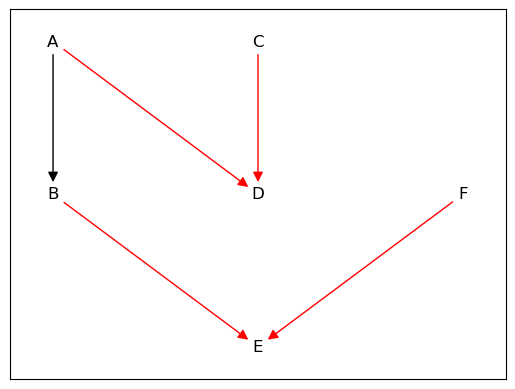

In [24]:
m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\discrete.dat")